In [1]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/nmhs2/hari/work/UAV/Projects/breast_cancer/Diagnostic_Breast_Cancer_Dataset.csv")
df.head()

,ID,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,...,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [4]:
df.isnull().sum()

ID                         0
Mean Radius                0
Mean Texture               0
Mean Perimeter             0
Mean Area                  0
Mean Smoothness            0
Mean Compactness           0
Mean Concavity             0
Mean Concave Points        0
Mean Symmetry              0
Mean Fractal Dimension     0
Radius SE                  0
Texture SE                 0
Perimeter SE               0
Area SE                    0
Smoothness SE              0
Compactness SE             0
Concavity SE               0
Concave Points SE          0
Symmetry SE                0
Fractal Dimension SE       0
Worst Radius               0
Worst Texture              0
Worst Perimeter            0
Worst Area                 0
Worst Smoothness           0
Worst Compactness          0
Worst Concavity            0
Worst Concave Points       0
Worst Symmetry             0
Worst Fractal Dimension    0
Diagnosis                  0
dtype: int64

In [7]:
print("Unique values:\n")

for col in df.columns:
    unique_count = df[col].nunique()
    
    print(f"Column: {col}")
    print(f"Unique Count: {unique_count}")
    
    if unique_count < 10:
        uniques = df[col].unique()
        print(f"Unique Values: {list(uniques)}")
    
    print("-" * 50)

Unique values:

Column: ID
Unique Count: 569
--------------------------------------------------
Column: Mean Radius
Unique Count: 456
--------------------------------------------------
Column: Mean Texture
Unique Count: 479
--------------------------------------------------
Column: Mean Perimeter
Unique Count: 522
--------------------------------------------------
Column: Mean Area
Unique Count: 539
--------------------------------------------------
Column: Mean Smoothness
Unique Count: 474
--------------------------------------------------
Column: Mean Compactness
Unique Count: 537
--------------------------------------------------
Column: Mean Concavity
Unique Count: 537
--------------------------------------------------
Column: Mean Concave Points
Unique Count: 542
--------------------------------------------------
Column: Mean Symmetry
Unique Count: 432
--------------------------------------------------
Column: Mean Fractal Dimension
Unique Count: 499
------------------------------

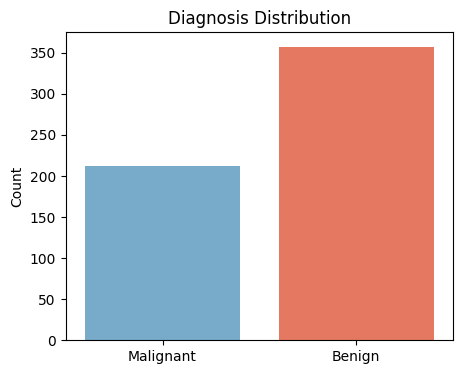

In [8]:
palette_diag = ["#6BAED6", "#FB6A4A"]

plt.figure(figsize=(5,4))
sns.countplot(
    data=df,
    x="Diagnosis",
    palette=palette_diag
)
plt.title("Diagnosis Distribution")
plt.xlabel("")
plt.ylabel("Count")
plt.show()

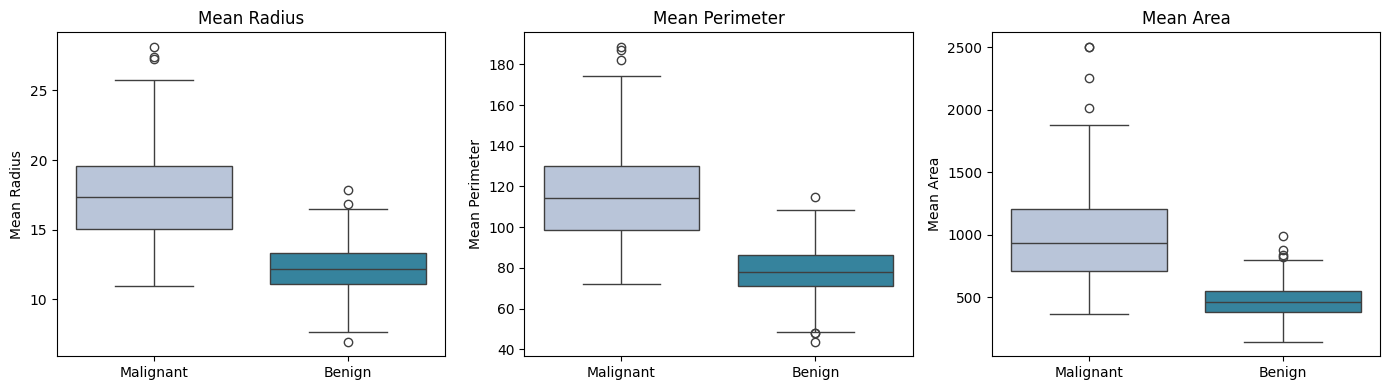

In [9]:
mean_features = [
    "Mean Radius",
    "Mean Perimeter",
    "Mean Area"]

palette_mean = sns.color_palette("PuBuGn", n_colors=2)

plt.figure(figsize=(14,4))

for i, col in enumerate(mean_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(
        data=df,
        x="Diagnosis",
        y=col,
        palette=palette_mean
    )
    plt.title(col)
    plt.xlabel("")
    
plt.tight_layout()
plt.show()

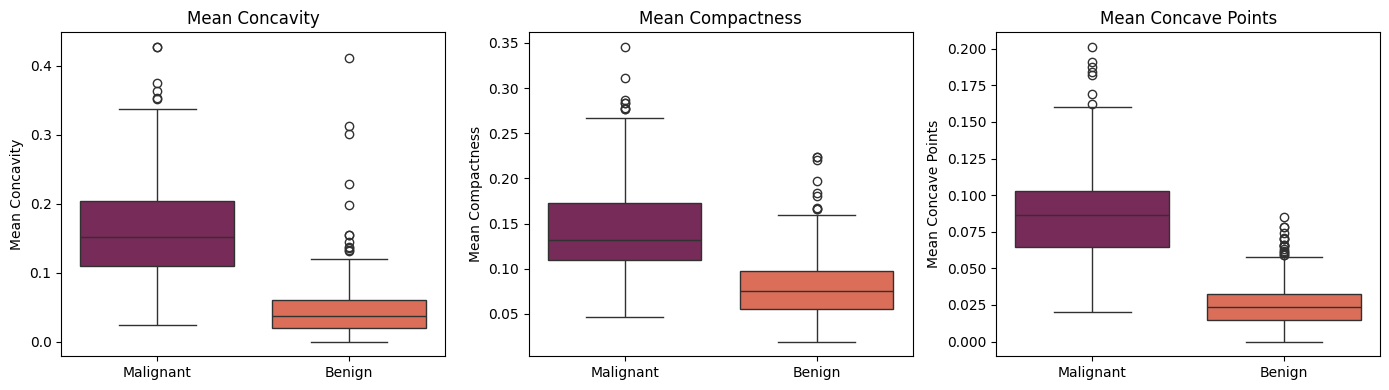

In [10]:
shape_features = [
    "Mean Concavity",
    "Mean Compactness",
    "Mean Concave Points"]

palette_shape = sns.color_palette("rocket", n_colors=2)

plt.figure(figsize=(14,4))

for i, col in enumerate(shape_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(
        data=df,
        x="Diagnosis",
        y=col,
        palette=palette_shape
    )
    plt.title(col)
    plt.xlabel("")

plt.tight_layout()
plt.show()

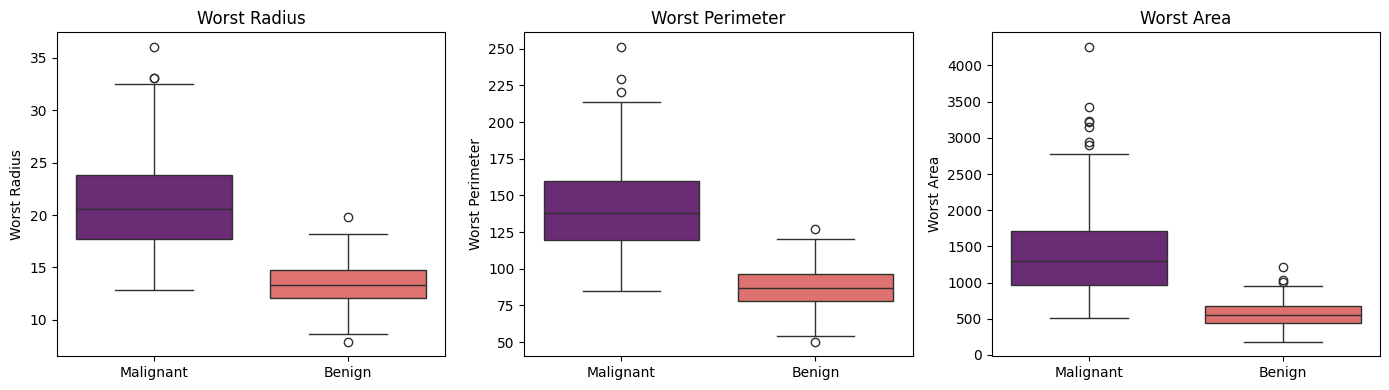

In [11]:
worst_features = [
    "Worst Radius",
    "Worst Perimeter",
    "Worst Area"]

palette_worst = sns.color_palette("magma", n_colors=2)

plt.figure(figsize=(14,4))

for i, col in enumerate(worst_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(
        data=df,
        x="Diagnosis",
        y=col,
        palette=palette_worst
    )
    plt.title(col)
    plt.xlabel("")

plt.tight_layout()
plt.show()

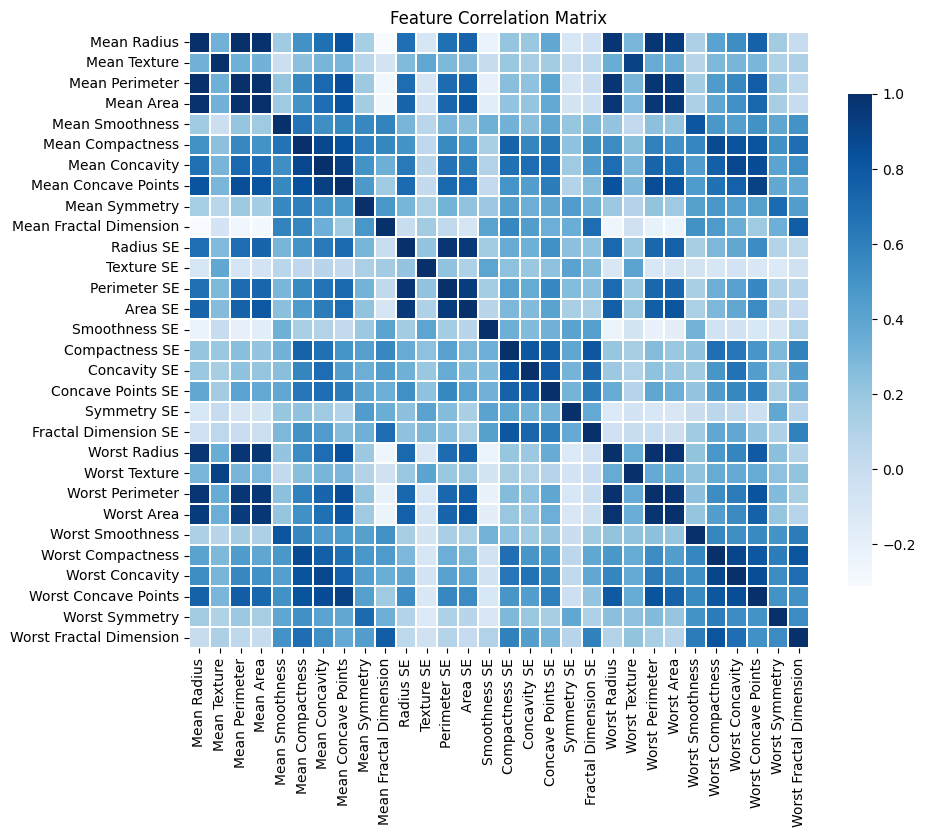

In [13]:
df_corr_features = df.drop(["ID", "Diagnosis"], axis=1)
corr_matrix_features = df_corr_features.corr()

plt.figure(figsize=(10,8))

sns.heatmap(
    corr_matrix_features,
    cmap="Blues",
    linewidths=0.2,
    cbar_kws={"shrink": 0.8}
)

plt.title("Feature Correlation Matrix")
plt.show()

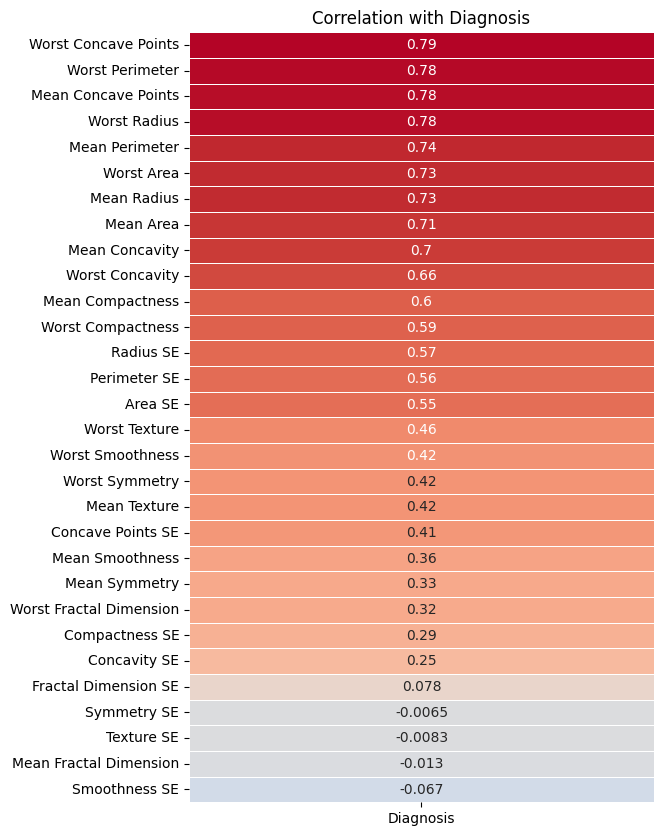

In [14]:
df_corr = df.copy()

df_corr["Diagnosis"] = df_corr["Diagnosis"].map({
    "Benign": 0,
    "Malignant": 1
})

corr_matrix = df_corr.drop("ID", axis=1).corr()

diag_corr = (
    corr_matrix["Diagnosis"]
    .drop("Diagnosis")
    .sort_values(ascending=False))

plt.figure(figsize=(6,10))
sns.heatmap(
    diag_corr.to_frame(),
    annot=True,
    cmap="coolwarm",
    center=0,
    linewidths=0.4,
    cbar=False
)
plt.title("Correlation with Diagnosis")
plt.show()